Был проведён анализ научной литературы по выбранным признакам для модели прогнозирования выгорания сотрудников. Выделены следующие признаки после анализа датасета ([смотреть analysis](./analysis/)):
- Age
- Attrition
- BusinessTravel
- DailyRate
- Department
- DistanceFromHome
- Education
- EducationField
- Gender
- HourlyRate
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- OverTime
- PercentSalaryHike
- RelationshipSatisfaction
- TotalWorkingYears
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

Далее рассмотрены параметры и соответствующие научные статьи, подтверждающие их важность:

- **Age**, **Gender**: Исследование [Do age and gender contribute to workers' burnout symptoms?](https://pubmed.ncbi.nlm.nih.gov/29912439/) показало, что возраст и пол влияют на симптомы эмоционального выгорания у работников. У молодых сотрудников и женщин старше 55 лет отмечены повышенные уровни эмоционального истощения.

- **MaritalStatus**, **RelationshipSatisfaction**: Работа [Взаимосвязь выгорания и удовлетворённости браком](https://cyberleninka.ru/article/n/vzaimosvyaz-vygoraniya-i-udovletvoryonnosti-brakom-u-sotrudnikov-rossiyskih-organizatsiy?ysclid=m3bgztidjq247739792) выявила, что удовлетворённость браком снижает уровень выгорания, особенно у женщин, что подчеркивает важность личных отношений для поддержания психического здоровья сотрудников.

- **MonthlyRate**: Статья [Влияние уровня дохода и отношения к деньгам на синдром профессионального выгорания](https://cyberleninka.ru/article/n/vliyanie-urovnya-dohoda-i-otnosheniya-k-dengam-na-vyrazhennost-sindroma-professionalnogo-vygoraniya/viewer) демонстрирует связь между уровнем дохода и выгоранием. У лиц с низким доходом наблюдаются выраженные симптомы выгорания, вызванные финансовым стрессом.

- **OverTime**: Исследование [Monitask](https://www.monitask.com/en/blog/overworking-and-burnout) подтверждает, что чрезмерная работа (более 40 часов в неделю на постоянной основе) ведет к переутомлению и истощению, повышая риск эмоционального выгорания.

- **JobSatisfaction**: Работа [Job Satisfaction and Burnout](https://www.researchgate.net/publication/241742933_Job_Satisfaction_and_Burnout) установила, что низкая удовлетворённость работой повышает риск эмоционального выгорания, а неудовлетворенность зарплатой и карьерными перспективами является ключевыми факторами текучести кадров.

- **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager**: Исследование [Особенности проявления психического и эмоционального выгорания в разных профессиях управленческой сферы](https://cyberleninka.ru/article/n/osobennosti-proyavleniya-psihicheskogo-i-emotsionalnogo-vygoraniya-v-raznyh-professiyah-upravlencheskoy-sfery?ysclid=m3eukgygwq559610429) показало, что длительный срок работы на одной позиции или под руководством одного менеджера может повышать риск выгорания из-за повторяющихся обязанностей и отсутствия карьерного роста.

- **BusinessTravel**, **DistanceFromHome**: Статьи [The Impact of Short Overseas Business Trips on Job Stress and Burnout](https://www.academia.edu/124466496/The_Impact_of_Short_Overseas_Business_Trips_on_Job_Stress_and_Burnout) и [Distance from Hometown and Employee Performance](https://marriott.byu.edu/upload/event/event_549/_doc/Distance%20from%20Hometown%20and%20Employee%20Performance%20-%20Choudhury%20and%20Kwon%20(1).pdf) анализируют влияние деловых поездок и расстояния до дома на уровень стресса и выгорания. Смена обстановки иногда снижает стресс, однако частые командировки могут также приводить к накоплению стресса.

- **WorkLifeBalance**: Исследование [Work-life Balance and Burnout on Employee: A Systematic Literature Review and Bibliometric Analysis](https://www.researchgate.net/publication/375941963_Work-life_Balance_and_Burnout_on_Employee_A_Systematic_Literature_Review_and_Bibliometric_Analysis) подчеркивает необходимость соблюдения баланса между работой и личной жизнью, поскольку этот фактор напрямую влияет на снижение уровня выгорания и повышение продуктивности.

Дополнительно, работа [JOB BURNOUT EMPLOYEE ATTRITION: A SYMBIOTIC RELATIONSHIP](https://www.researchgate.net/publication/354178328_JOB_BURNOUT_EMPLOYEE_ATTRITION_A_SYMBIOTIC_RELATIONSHIP) освещает тесную взаимосвязь между выгоранием и текучестью кадров, что подтверждает необходимость комплексного подхода к улучшению условий труда и удовлетворенности сотрудников для снижения рисков выгорания и текучести.

- Age
- Gender
- MaritalStatus
- RelationshipSatisfaction
- MonthlyRate
- OverTime
- JobSatisfaction
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- BusinessTravel
- DistanceFromHome
- WorkLifeBalance

Эти параметры были выбраны на основе научных исследований для обеспечения обоснованности модели и повышения точности прогнозирования выгорания сотрудников.


Рассмотртим анализ SHAP значений для нашей модели, чтобы точно определить, какие признаки наиболее существенно влияют на риск выгорания сотрудников.

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.utils import resample
import read_data  
import joblib  
import os

DATASET_PATH = '../dataset.csv'
NEW_DATASET_PATH = 'new_dataset.csv'
SCALERS_PATH = 'scalers/'

if not os.path.exists(SCALERS_PATH):
    os.makedirs(SCALERS_PATH)

dataset = pd.read_csv(DATASET_PATH)

necessary_columns_path = 'C:\\Users\\MSI\\Prediction-employee-burnout\\analysis\\necessary_columns'
with open(necessary_columns_path, 'r') as file:
    necessary_columns_name = [line.strip() for line in file.readlines()]

data = dataset[necessary_columns_name]

data_conv = read_data.convert_data(data)

print("Форма data_conv:", data_conv.shape)

print("Первичные 5 строк после convert_data:")
print(data_conv[:5])

x_data = np.concatenate((data_conv[:, :1], data_conv[:, 2:]), axis=1)
y_data = data_conv[:, 1]

x_class0 = x_data[y_data == 0]
y_class0 = y_data[y_data == 0]
x_class1 = x_data[y_data == 1]
y_class1 = y_data[y_data == 1]

print(f"Количество экземпляров класса 0: {len(y_class0)}")
print(f"Количество экземпляров класса 1: {len(y_class1)}")

x_class1_oversampled, y_class1_oversampled = resample(
    x_class1,
    y_class1,
    replace=True,                   
    n_samples=5 * len(y_class1),   
    random_state=42                  
)

x_data_balanced = np.vstack((x_class0, x_class1, x_class1_oversampled))
y_data_balanced = np.hstack((y_class0, y_class1, y_class1_oversampled))

print("Распределение классов после балансировки:", np.bincount(y_data_balanced.astype(int)))

standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(x_data_balanced)

normalizer = Normalizer()
x_normalized = normalizer.fit_transform(x_scaled)

x_columns = [necessary_columns_name[0]] + necessary_columns_name[2:]
y_column = 'Attrition' 

processed_data_df = pd.DataFrame(x_normalized, columns=x_columns)
processed_data_df[y_column] = y_data_balanced

processed_data_df.to_csv(NEW_DATASET_PATH, index=False)

joblib.dump(standard_scaler, os.path.join(SCALERS_PATH, 'standard_scaler.pkl'))
joblib.dump(normalizer, os.path.join(SCALERS_PATH, 'normalizer.pkl'))

print(f"Обработанные данные успешно сохранены в файл '{NEW_DATASET_PATH}'")
print(f"Масштабировщики сохранены в папку '{SCALERS_PATH}'")


['Yes', 'No', 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'Research & Development', 'Sales', 'Human Resources', 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Male', 'Female', 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Married', 'Single', 'Divorced']
Форма data_conv: (1470, 27)
Первичные 5 строк после convert_data:
[[   41     1     0  1102     1     1     2     0     1    94     3     2
      0     4     1  5993 19479     8     1    11     1     8     1     6
      4     0     5]
 [   49     0     1   279     0     8     1     0     0    61     2     2
      1     2     0  5130 24907     1     0    23     4    10     3    10
      7     1     7]
 [   37     1     0  1373     0     2     2     4     0    92     2     1
      2     3     1  2090  2396     6     1    15     2     7     3     0
      0     0     0]
 [   33  

c:\Users\MSI\Prediction-employee-burnout\recommendations\read_data.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(x, alf[x], inplace=True)
c:\Users\MSI\Prediction-employee-burnout\recommendations\read_data.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(x, alf[x], inplace=True)


In [ ]:
import shap
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import os

PROCESSED_DATA_PATH = 'recommend/new_dataset.csv'
MODEL_PATH = 'first_model/first_model.keras'
SHAP_OUTPUT_FOLDER = 'shap_feature_importance/'

if not os.path.exists(SHAP_OUTPUT_FOLDER):
    os.makedirs(SHAP_OUTPUT_FOLDER)

processed_data_df = pd.read_csv(PROCESSED_DATA_PATH)

x_columns = processed_data_df.drop(columns=['Attrition']).columns.tolist()
x_normalized = processed_data_df.drop(columns=['Attrition']).values
y_processed = processed_data_df['Attrition'].values

model = keras.models.load_model(MODEL_PATH)

explainer = shap.Explainer(model, x_normalized)
shap_values = explainer(x_normalized)

print(f"Тип shap_values: {type(shap_values)}")
print(f"Форма shap_values.values: {shap_values.values.shape}") 

shap.summary_plot(shap_values.values, x_normalized, feature_names=x_columns, show=False)
plt.savefig(os.path.join(SHAP_OUTPUT_FOLDER, 'shap_summary_plot.png'))
plt.close()

shap_importance = np.abs(shap_values.values).mean(axis=0)

mean_shap_values = shap_values.values.mean(axis=0)
feature_direction = np.where(mean_shap_values >= 0, 1, 0)

feature_importance = pd.DataFrame({
    'Feature': x_columns,
    'Mean |SHAP|': shap_importance,
    'Direction': feature_direction
})

feature_importance_sorted = feature_importance.sort_values(by='Mean |SHAP|', ascending=False)

feature_importance_sorted.to_csv(os.path.join(SHAP_OUTPUT_FOLDER, 'shap_feature_importance.csv'), index=False)

top_features = feature_importance_sorted.head(10)
print(top_features)

top_features.to_csv(os.path.join(SHAP_OUTPUT_FOLDER, 'shap_top_features.csv'), index=False)

shap.summary_plot(shap_values.values, x_normalized, feature_names=x_columns, plot_type="bar", show=False)
plt.savefig(os.path.join(SHAP_OUTPUT_FOLDER, 'shap_bar_plot.png'))
plt.close()


c:\Users\MSI\Investigation-of-methods-of-specific-image-augmentation\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 2656it [22:16,  1.98it/s]                          


Тип shap_values: <class 'shap._explanation.Explanation'>
Форма shap_values.values: (2655, 26)
                     Feature  Mean |SHAP|  Direction
17                  OverTime     0.160603          0
16        NumCompaniesWorked     0.086496          0
1             BusinessTravel     0.083941          0
4           DistanceFromHome     0.077266          0
12           JobSatisfaction     0.069439          0
21           WorkLifeBalance     0.059503          0
9             JobInvolvement     0.057931          0
23        YearsInCurrentRole     0.054201          1
19  RelationshipSatisfaction     0.053441          0
0                        Age     0.052439          0


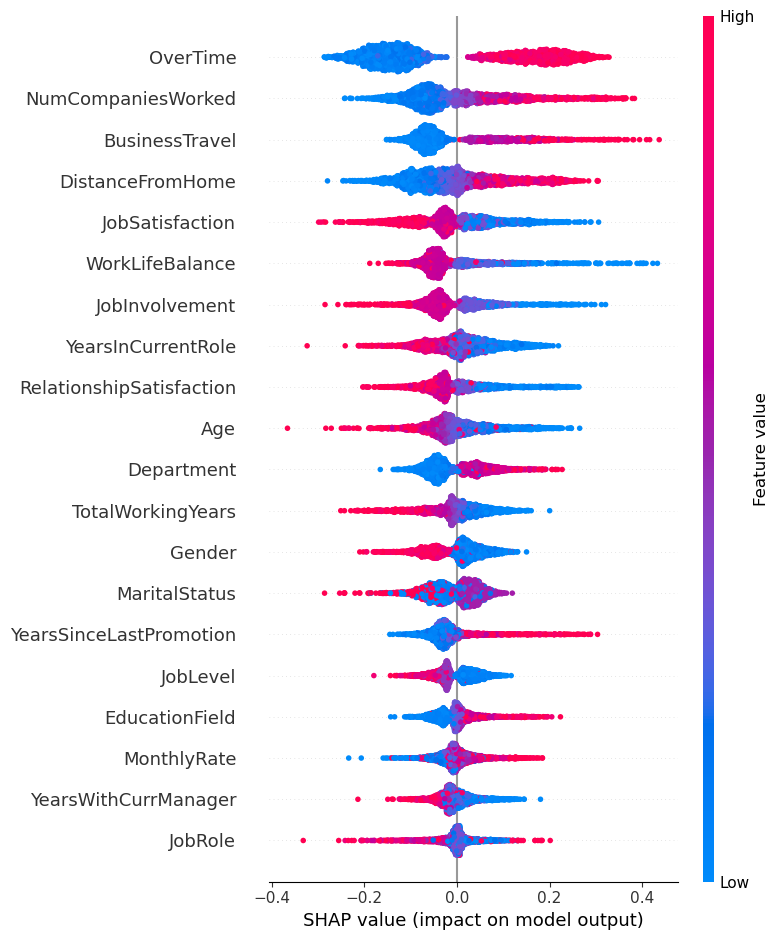

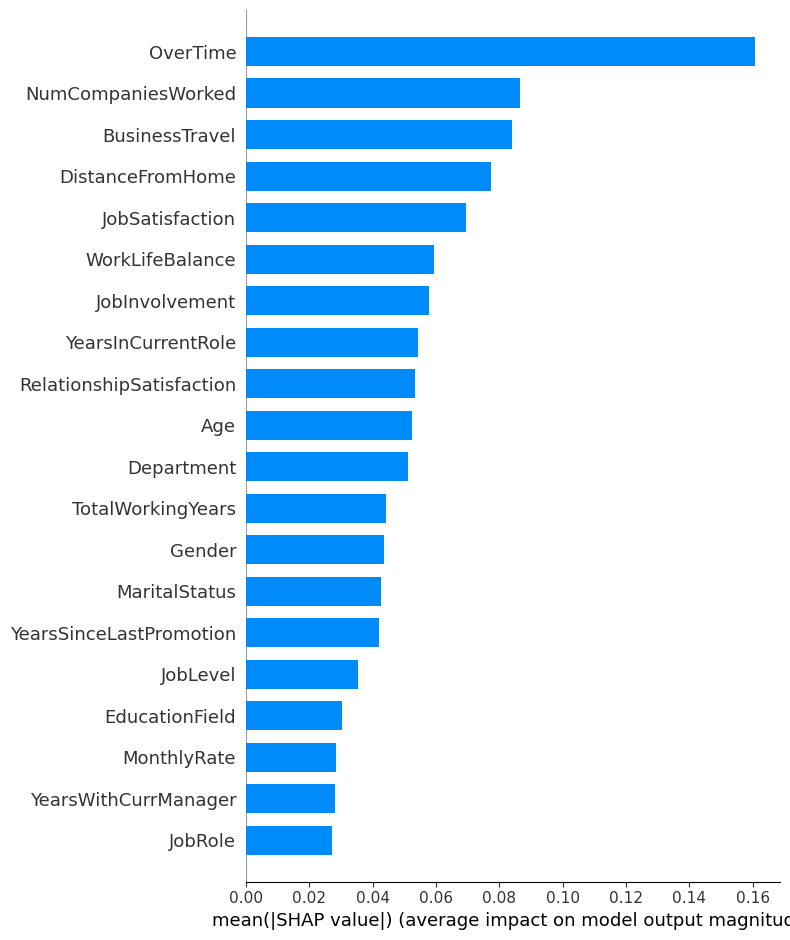

In [7]:
shap.summary_plot(shap_values.values, x_normalized, feature_names=x_columns, show=False)
plt.show()
plt.close()
shap.summary_plot(shap_values.values, x_normalized, feature_names=x_columns, plot_type="bar", show=False)
plt.show()
plt.close()

In [6]:
import pickle

explainer_path = os.path.join("recommend\\", 'shap_explainer.pkl')
with open(explainer_path, 'wb') as f:
    pickle.dump(explainer, f)

print(f"Explainer сохранен в {explainer_path}")


Explainer сохранен в recommend\shap_explainer.pkl


На основании проведённого анализа научной литературы и данных мы выбрали конкретные параметры для формирования рекомендаций по предотвращению выгорания сотрудников. Эти параметры, отражающие как рабочие, так и личные аспекты жизни сотрудников, имеют научно доказанную значимость в прогнозировании эмоционального выгорания. Они включают:

- **OverTime**: Избыточные часы работы связаны с повышенным риском выгорания.
- **BusinessTravel** и **DistanceFromHome**: Частые командировки и удалённость от дома могут способствовать увеличению уровня стресса и выгорания.
- **JobSatisfaction**, **WorkLifeBalance**, **JobInvolvement**, **RelationshipSatisfaction**: Низкая удовлетворённость работой и балансом между работой и личной жизнью, а также отсутствие вовлечённости и поддерживающих отношений на рабочем месте усиливают риск выгорания.
- **YearsSinceLastPromotion**, **YearsWithCurrManager**, **JobLevel**: Длительное время без повышения и высокая должность связаны с выгоранием, особенно при отсутствии карьерного роста.
- **PercentSalaryHike**, **MonthlyRate**, **MonthlyIncome**: Финансовые условия работы оказывают влияние на уровень удовлетворённости и риск выгорания.
- **JobRole**: Специфика роли также влияет на степень стресса и выгорания.

Используя метод анализа значимости признаков SHAP, мы можем точно определить вклад каждого из этих признаков в риск выгорания сотрудников и более эффективно предлагать персонализированные рекомендации(смотреть [recommendations](recommendetions.py)).